#### Imports

In [79]:
from pptx.util import Pt
from pptx import Presentation
from pptx.dml.color import RGBColor
from pptx.enum.text import MSO_AUTO_SIZE
from pptx.enum.text import MSO_ANCHOR

from PIL import Image
import matplotlib.pyplot as plt

import aspose.pydrawing as draw
import aspose.slides as slides

#### Funcions

In [15]:
def plot_slide(presentation, slide, show=True):

    # Instantiate a Presentation class that represents the presentation file
    with slides.Presentation(presentation) as pres:
        # Access the first slide
        sld = pres.slides[slide]

        # User defined dimension
        desiredX = 210*4
        desiredY = 297*4

        # Getting scaled value  of X and Y
        ScaleX = (1.0 / pres.slide_size.size.width) * desiredX
        ScaleY = (1.0 / pres.slide_size.size.height) * desiredY


        # Create a full scale image
        bmp = sld.get_thumbnail(ScaleX, ScaleY)

        # save the image to disk in JPEG format
        bmp.save("temp.jpg", draw.imaging.ImageFormat.jpeg)
    
        fig, ax = plt.subplots(figsize=(21/2,29.7/2))
        plt.imshow(plt.imread("temp.jpg"))
        plt.axis("off")
        if show: 
            plt.show()
        return ax

#### Reading data

In [17]:
dir_xavi = r"C:\Users\xavim\Desktop\Uni\3er\2\Syntesis/"
dir_maria = r"C:\Users\Maria\OneDrive - UAB\Documentos\3r de IA\Synthesis project II\Github/"

dir2DS = "Project_Synthesis2-/Datasets/DocTR_output/"
file2open = "Bank account statements/Estado de cuenta completo BBVA_0.txt"

try: 
    dir2Main = dir_xavi
    with open(dir_xavi+dir2DS+file2open, 'r', encoding = "utf8") as file:
        raw_data = file.readlines()
except:
    dir2Main = dir_maria
    with open(dir_maria+dir2DS+file2open, 'r', encoding = "utf8") as file:
        raw_data = file.readlines()
raw_data[:5]

["[1020, 6, 1092, 29, 'Estado', 0.9949026107788086, 17]\n",
 "[1092, 5, 1124, 31, 'de', 0.99998939037323, 19]\n",
 "[1124, 6, 1200, 29, 'Cuenta', 0.8463806509971619, 17]\n",
 "[920, 39, 999, 57, 'Libreton', 0.9874507188796997, 13]\n",
 "[1002, 36, 1064, 59, 'Basico', 0.6583079695701599, 17]\n"]

In [11]:
data = [item.strip("[]\n").split(", ") for item in raw_data]

for sublist in data:
    for i, item in enumerate(sublist):
        if item.isdigit():
            sublist[i] = int(item)
        elif item.replace('.', '', 1).isdigit():  # Check for floating point number
            sublist[i] = float(item)
        else:
            sublist[i] = item.strip("'")  # Remove single quotes from strings

print(data[:5])

[[1020, 6, 1092, 29, 'Estado', 0.9949026107788086, 17], [1092, 5, 1124, 31, 'de', 0.99998939037323, 19], [1124, 6, 1200, 29, 'Cuenta', 0.8463806509971619, 17], [920, 39, 999, 57, 'Libreton', 0.9874507188796997, 13], [1002, 36, 1064, 59, 'Basico', 0.6583079695701599, 17]]


In [23]:
file_name, page = file2open.split("_")
page = page[:-4] # to remove .txt

img = Image.open(f"{dir2Main}/Project_Synthesis2-/Sample documents - PNG/{file_name}/{page}.png")
width, height = img.size

#### Tests

In [80]:
def add_text_in_bounding_boxes(presentation, slide_index, text, coordinates):
    slide = presentation.slides[slide_index]
    left, top, width, height = coordinates
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    # tf.word_wrap = True
    tf.paragraphs[0].font.size = Pt(10)
    tf.paragraphs[0].text = text
    tf.vertical_anchor = MSO_ANCHOR.MIDDLE
    tf.auto_size = MSO_AUTO_SIZE.SHAPE_TO_FIT_TEXT

In [81]:
presentation = Presentation("template.pptx")

for words in data:
    coordinates = Pt(words[0] / 2.4), Pt(words[1] / 2.4), Pt((words[2] - words[0])), Pt((words[3] - words[1]))
    text = words[4]
    add_text_in_bounding_boxes(presentation, 0, text, coordinates)
    
presentation.save("predefined_layout.pptx")

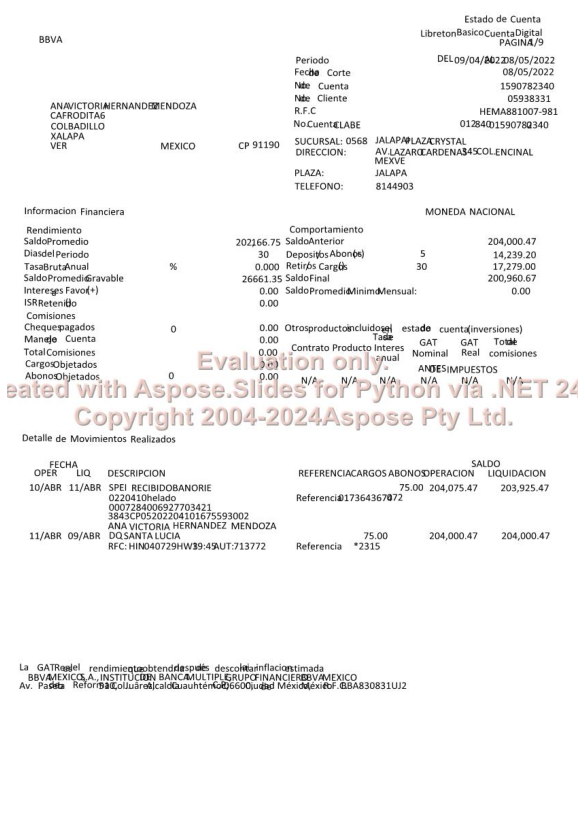

<Axes: >

In [76]:
plot_slide("predefined_layout.pptx", 0)